# 환경설정


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd /content/drive/MyDrive/kimjuyeon/NLP 스터디/nlp-code-study/02_text_relation

/content/drive/Othercomputers/내 컴퓨터/kimjuyeon/NLP 스터디/nlp-code-study/02_text_relation


# EDA(Exploratory Data Analysis)

#Import Package
* 데이터를 확인을 위한 패키지 불러오기

In [36]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# load Data

In [37]:
PATH = '/content/drive/MyDrive/kimjuyeon/NLP 스터디/nlp-code-study/02_text_relation/data'

train_data = pd.read_csv(os.path.join(PATH, 'train_data.csv'), encoding='utf-8')
test_data = pd.read_csv(os.path.join(PATH, 'test_data.csv'), encoding='utf-8')

# Train, Test Data 확인

In [38]:
train_data.head(5)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [39]:
print(train_data.info(), end='\n\n')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1666 non-null   int64 
 1   premise     1666 non-null   object
 2   hypothesis  1666 non-null   object
 3   label       1666 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB
None


In [40]:
print("Train Columns :", train_data.columns)
print("Test COlumns :", test_data.columns)

Train Columns : Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')
Test COlumns : Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')


In [41]:
# value_counts -> 기본적으로 지정된 열의 각 값(value)에 대한 모든 발생 횟수를 반환
print("Train Label :", train_data['label'].value_counts(), sep='\n', end='\n\n')
print("Test Label :", test_data['label'].value_counts(), sep='\n')

Train Label :
entailment       8561
contradiction    8489
neutral          7948
Name: label, dtype: int64

Test Label :
answer    1666
Name: label, dtype: int64


In [42]:
# 결측치 확인
print("Train Null :", train_data.isnull().sum(), sep='\n', end='\n\n')
print("Test Null :", test_data.isnull().sum(), sep='\n')

Train Null :
index         0
premise       0
hypothesis    0
label         0
dtype: int64

Test Null :
index         0
premise       0
hypothesis    0
label         0
dtype: int64


# Label 분포 확인
* Train Dataset의 Label 분포를 Bar Chart를 사용화하여 시각화

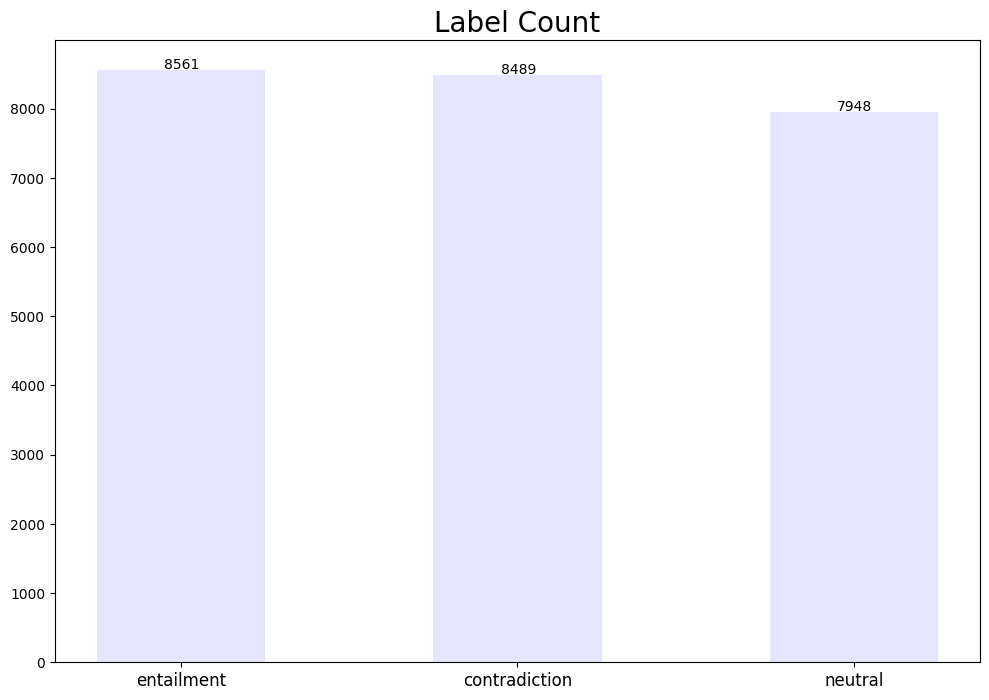

In [43]:
feature = train_data['label']

plt.figure(figsize=(10, 7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.1)
# width -> 막대 bar width
# color -> 막대 bar color
# alpha -> 막대 bar 투명도

plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
# 첫번쨰 인자 -> text x 좌표 개념
# 두번째 인자 -> text y 좌표 개념
# 세번째 인자 -> 출력할 text

plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.003, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

# 전체, 가설 길이 확인
* Train에 존재하는 Premize(전제), Hypothesis(가설)의 길이를 확인하고 이를 통해 Tokenizer의 max_length 설정 가능

In [44]:
premise_max_len = np.max(train_data['premise'].str.len())
premise_min_len = np.min(train_data['premise'].str.len())
premise_mean_len = np.mean(train_data['premise'].str.len())

print("Max premise length:", premise_max_len)
print("Min premise length:", premise_min_len)
print("Mean premise length:", premise_mean_len)

Max premise length: 90
Min premise length: 19
Mean premise length: 45.406552524201935


In [45]:
hypothesis_max_len = np.max(train_data['hypothesis'].str.len())
hypothesis_min_len = np.min(train_data['hypothesis'].str.len())
hypothesis_mean_len = np.mean(train_data['hypothesis'].str.len())

print("Max hypothesis length:", hypothesis_max_len)
print("Min hypothesis length:", hypothesis_min_len)
print("Mean hypothesis length:", hypothesis_mean_len)

Max hypothesis length: 103
Min hypothesis length: 5
Mean hypothesis length: 24.924433954716378


* histogram으로 분포 확인

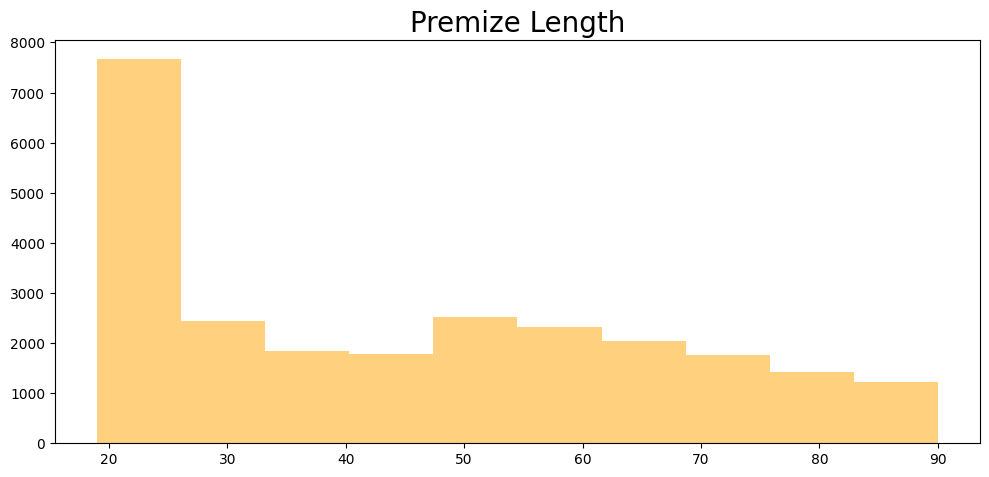

In [46]:
from collections import Counter

plt.figure(figsize=(10, 7.5))
plt.title('Premize Length', fontsize=20)

plt.hist(train_data['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.3, 1, 0.95]) # 레이아웃 설정

plt.show()

# 간단한 Text Preprocseeing
* 전체, 가설에 존재하는 한글 단어가 아닌 단어들은 전부 제거해준다

In [47]:
train_data['premise'] = train_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test_data['premise'] = test_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')

<ipython-input-47-509793e02d8c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['premise'] = train_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
<ipython-input-47-509793e02d8c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['premise'] = test_data['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')


In [48]:
train_data.head(5)

,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다.,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [49]:
train_data['hypothesis'] = train_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test_data['hypothesis'] = test_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')

<ipython-input-49-5ea796bc48c8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['hypothesis'] = train_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
<ipython-input-49-5ea796bc48c8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['hypothesis'] = test_data['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
